In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display, HTML

import torch
import torch.nn as nn
import torch.optim as optim

# Fix the dying kernel problem (only a problem in some installations - you can remove it, if it works without it)
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# PyTorch

Here's your best friend when working with PyTorch: https://pytorch.org/docs/stable/index.html.

The beginning of this notebook shows that PyTorch tensors can be used exactly like numpy arrays. Later in the notebook additional features of tensors will be presented.

## Creating PyTorch tensors

### Directly

In [10]:
a = np.array(
    [[1.0, 2.0, 3.0], 
     [4.0, 5.0, 6.0], 
     [7.0, 8.0, 9.0]]
)

print(a)
print()

t = torch.tensor(
    [[1.0, 2.0, 3.0], 
     [4.0, 5.0, 6.0], 
     [7.0, 8.0, 9.0]]
)

print(t)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


### From a list

In [6]:
l = [[1.0, 2.0, 3.0], 
     [4.0, 5.0, 6.0], 
     [7.0, 8.0, 9.0]]

print(l)
print()

a = np.array(l)
print(a)
print()

t = torch.tensor(l)
print(t)

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


### From a list comprehension

In [7]:
a = [i**2 for i in range(10)]

print(a)
print()
print(np.array(a))
print()
print(torch.tensor(a))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

[ 0  1  4  9 16 25 36 49 64 81]

tensor([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])


### From a numpy array

In [8]:
a = np.array(
    [[1.0, 2.0, 3.0], 
     [4.0, 5.0, 6.0], 
     [7.0, 8.0, 9.0]]
)

t = torch.tensor(a)

print(t)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)


### Ready-made functions in PyTorch

In [32]:
# All zeros
a = torch.zeros((3, 4))
print("All zeros")
print(a)
print()

# All a chosen value
a = torch.full((3, 4), 7.0)
print("All chosen value (variant 1)")
print(a)
print()

# or

a = torch.zeros((3, 4))
a[:] = 7.0
print("All chosen value (variant 2)")
print(a)
print()

# Random integers

print("Random integers")
a = np.random.randint(low=0, high=10, size=(3, 2))
print(a)
print()
a = torch.randint(low=0, high=10, size=(3, 2))
print(a)
print()

# Random values from the normal distribution (Gaussian)

print("Random values from the normal distribution")
a = np.random.normal(loc=0, scale=10, size=(3, 2))
print(a)
print()
a = torch.normal(mean=0, std=10, size=(3, 2))
print(a)

All zeros
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

All chosen value (variant 1)
tensor([[7., 7., 7., 7.],
        [7., 7., 7., 7.],
        [7., 7., 7., 7.]])

All chosen value (variant 2)
tensor([[7., 7., 7., 7.],
        [7., 7., 7., 7.],
        [7., 7., 7., 7.]])

Random integers
[[0 3]
 [4 8]
 [9 8]]

tensor([[5, 3],
        [9, 5],
        [3, 1]])

Random values from the normal distribution
[[ 5.94431893 -4.55780615]
 [-3.35091658 -2.97753669]
 [-4.34449757  1.45022714]]

tensor([[10.8315, -7.9192],
        [ 0.7817, -6.6352],
        [ 5.9578,  3.1680]])


## Slicing PyTorch tensors

### Slicing in 1D

To obtain only specific values from a PyTorch tensor one can use so called slicing. It has the form

**arr[low:high:step]**

where low is the lowest index to be retrieved, high is the lowest index not to be retrieved and step indicates that every step element will be taken.

In [16]:
a = torch.tensor([i**2 for i in range(10)])

print("Original: ", a)
print("First 5 elements:", a[:5])
print("Elements from index 3 to index 5:", a[3:6])
print("Last 3 elements (negative indexing):", a[-3:])
print("Every second element:", a[::2])

print("Negative step a[::-1] to obtain reverse order does not work for tensors")

Original:  tensor([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])
First 5 elements: tensor([ 0,  1,  4,  9, 16])
Elements from index 3 to index 5: tensor([ 9, 16, 25])
Last 3 elements (negative indexing): tensor([49, 64, 81])
Every second element: tensor([ 0,  4, 16, 36, 64])
Negative step a[::-1] to obtain reverse order does not work for tensors


### Slicing in 2D

In two dimensions it works similarly, just the slicing is separate for every dimension.

In [18]:
a = torch.tensor([i for i in range(25)]).reshape(5, 5)

print("Original: ")
print(a)
print()
print("First 2 elements of the first 3 row:")
print(a[:3, :2])
print()
print("Middle 3 elements from the middle 3 rows:")
print(a[1:4, 1:4])
print()
print("Bottom-right 3 by 3 submatrix (negative indexing):")
print(a[-3:, -3:])

Original: 
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

First 2 elements of the first 3 row:
tensor([[ 0,  1],
        [ 5,  6],
        [10, 11]])

Middle 3 elements from the middle 3 rows:
tensor([[ 6,  7,  8],
        [11, 12, 13],
        [16, 17, 18]])

Bottom-right 3 by 3 submatrix (negative indexing):
tensor([[12, 13, 14],
        [17, 18, 19],
        [22, 23, 24]])


### Setting PyTorch tensor field values

In [20]:
a = torch.tensor([i for i in range(25)]).reshape(5, 5)

print("Original: ")
print(a)
print()

a[1:4, 1:4] = 5.0

print("Middle values changed to 5")
print(a)
print()

b = torch.tensor([i**2 - i for i in range(9)]).reshape(3, 3)

print("Second matrix")
print(b)
print()

a[1:4, 1:4] = b

print("Second matrix substituted into the middle of the first matrix")
print(a)

Original: 
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

Middle values changed to 5
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  5,  5,  5,  9],
        [10,  5,  5,  5, 14],
        [15,  5,  5,  5, 19],
        [20, 21, 22, 23, 24]])

Second matrix
tensor([[ 0,  0,  2],
        [ 6, 12, 20],
        [30, 42, 56]])

Second matrix substituted into the middle of the first matrix
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  0,  0,  2,  9],
        [10,  6, 12, 20, 14],
        [15, 30, 42, 56, 19],
        [20, 21, 22, 23, 24]])


## Operations on PyTorch tensors

It is important to remember that arithmetic operations on PyTorch tensors are always element-wise.

In [21]:
a = torch.tensor([i**2 for i in range(9)]).reshape((3, 3))
print(a)
print()

b = torch.tensor([i**0.5 for i in range(9)]).reshape((3, 3))
print(b)
print()

tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])

tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 2.0000, 2.2361],
        [2.4495, 2.6458, 2.8284]])



### Element-wise sum

In [22]:
print(a + b)

tensor([[ 0.0000,  2.0000,  5.4142],
        [10.7321, 18.0000, 27.2361],
        [38.4495, 51.6458, 66.8284]])


### Element-wise multiplication

In [23]:
print(a * b)

tensor([[  0.0000,   1.0000,   5.6569],
        [ 15.5885,  32.0000,  55.9017],
        [ 88.1816, 129.6418, 181.0193]])


### Matrix multiplication

In [30]:
print(np.matmul(a, b))
print()

# Multiplication by the identity matrix (to check it works as expected)
id_matrix = torch.tensor(
    [[1.0, 0.0, 0.0], 
     [0.0, 1.0, 0.0], 
     [0.0, 0.0, 1.0]]
)

# Tensor a contained integers (type Long by default) and must be changed to the float type
a = a.type(torch.FloatTensor)

print(torch.matmul(id_matrix, a))

tensor([[ 11.5300,  12.5830,  13.5498],
        [ 88.9501, 107.1438, 119.2157],
        [241.6378, 303.3281, 341.4984]], dtype=torch.float64)

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.],
        [36., 49., 64.]])


### Calculating the mean

In [37]:
a = torch.randint(low=0, high=10, size=(5,))

print(a)
print()

print("Mean: ", torch.sum(a) / len(a))
print()

# To get a single value use tensor.item()

print("Mean: ", (torch.sum(a) / len(a)).item())

tensor([9, 6, 2, 7, 3])

Mean:  tensor(5.4000)

Mean:  5.400000095367432


### Calculating the mean of every row

In [38]:
a = torch.randint(low=0, high=10, size=(5, 3))

print(a)
print()

print("Mean:", torch.sum(a, axis=1) / a.shape[1])

print("Mean in the original matrix form:")
print((torch.sum(a, axis=1) / a.shape[1]).reshape(-1, 1))  # -1 calculates the right size to use all elements

tensor([[9, 6, 6],
        [4, 8, 1],
        [9, 8, 8],
        [0, 8, 6],
        [9, 6, 2]])

Mean: tensor([7.0000, 4.3333, 8.3333, 4.6667, 5.6667])
Mean in the original matrix form:
tensor([[7.0000],
        [4.3333],
        [8.3333],
        [4.6667],
        [5.6667]])


### More complex operations

Note that more complex tensor operations can only be performed on tensors. Numpy operations can be performed on numpy arrays but also directly on lists.

In [43]:
a = torch.tensor([1.0, 2.0, 3.0])

print("Vector to power 2 (element-wise)")
print(torch.pow(a, 2))
print()
print("Euler number to the power a (element-wise)")
print(torch.exp(a))
print()
print("An even more complex expression")
print((torch.pow(a, 2) + torch.exp(a)) / torch.sum(a))

Vector to power 2 (element-wise)
tensor([1., 4., 9.])

Euler number to the power a (element-wise)
tensor([ 2.7183,  7.3891, 20.0855])

An even more complex expression
tensor([0.6197, 1.8982, 4.8476])


## PyTorch basic operations tasks

**Task 1.** Calculate the sigmoid (logistic) function on every element of the following array [0.3, 1.2, -1.4, 0.2, -0.1, 0.1, 0.8, -0.25] and print the last 5 elements. Use only tensor operations.

In [44]:
# Write your code here

tensor([0.5498, 0.4750, 0.5250, 0.6900, 0.4378])


**Task 2.** Calculate the dot product of the following two vectors:<br/>
$x = [3, 1, 4, 2, 6, 1, 4, 8]$<br/>
$y = [5, 2, 3, 12, 2, 4, 17, 11]$<br/>
a) by using element-wise mutliplication and torch.sum,<br/>
b) by using torch.dot,<br/>
b) by using torch.matmul and transposition (x.T).

In [45]:
# Write your code here

tensor(225)
tensor(225)
tensor(225)


**Task 3.** Calculate the following expression<br/>
$$\frac{1}{1 + e^{-x_0 \theta_0 - \ldots - x_9 \theta_9 - \theta_{10}}}$$
for<br/>
$x = [1.2, 2.3, 3.4, -0.7, 4.2, 2.7, -0.5, -2.1, -3.3, 0.2]$<br/>
$\theta = [7.7, 0.33, -2.12, -1.73, 2.9, -5.8, -0.9, 12.11, 3.43, -0.5, 1.65]$<br/>
and print the result. Use only tensor operations.

In [47]:
# Write your code here

0.24176998436450958


# Tensor gradients

Tensors are designed to be used in neural networks. Their most important functionality is automatic gradient and backward propagation calculation.

In [52]:
x = torch.tensor([[2., -1.], [3., 1.]], requires_grad=True)
out = x.pow(3).sum()  # the actual derivative is 3*x^2
print("out={}".format(out))
print()

out.backward()
print("gradient")
print(x.grad)

out=35.0

gradient
tensor([[12.,  3.],
        [27.,  3.]])
tensor([[ 2., -1.],
        [ 3.,  1.]], requires_grad=True)


In [59]:
x = torch.tensor([[2., -1., 3.]], requires_grad=True)
y = torch.tensor([[4., 2., -1.]], requires_grad=True)

z = torch.sum(x * y)

z.backward()
print(x.grad)
print(y.grad)

x.grad.data.zero_()
y.grad.data.zero_()

z = torch.sigmoid(torch.sum(x * y))

z.backward()
print(x.grad)
print(y.grad)

tensor([[ 4.,  2., -1.]])
tensor([[ 2., -1.,  3.]])
tensor([[ 0.1807,  0.0904, -0.0452]])
tensor([[ 0.0904, -0.0452,  0.1355]])


# Backpropagation

In this section we train weights $w$ of a simple model $y = \text{sigmoid}(w * x)$ to obtain $y = 0.65$ on $x = [2.0, -1.0, 3.0]$.

x
tensor([ 2., -1.,  3.])
x.grad
None
w
tensor([ 4.,  2., -1.], requires_grad=True)


w
tensor([ 3.9945,  2.0027, -1.0082], requires_grad=True)
w.grad
tensor([ 0.0547, -0.0273,  0.0820])
y
tensor(0.9526, grad_fn=<SigmoidBackward>)
loss
tensor(0.0916, grad_fn=<PowBackward0>)


w
tensor([ 3.9889,  2.0055, -1.0166], requires_grad=True)
w.grad
tensor([ 0.0563, -0.0281,  0.0844])
y
tensor(0.9508, grad_fn=<SigmoidBackward>)
loss
tensor(0.0905, grad_fn=<PowBackward0>)


w
tensor([ 3.9831,  2.0084, -1.0253], requires_grad=True)
w.grad
tensor([ 0.0579, -0.0290,  0.0869])
y
tensor(0.9489, grad_fn=<SigmoidBackward>)
loss
tensor(0.0894, grad_fn=<PowBackward0>)


w
tensor([ 3.6599,  2.1701, -1.5102], requires_grad=True)
w.grad
tensor([ 6.1291e-06, -3.0645e-06,  9.1936e-06])
y
tensor(0.6500, grad_fn=<SigmoidBackward>)
loss
tensor(4.5365e-11, grad_fn=<PowBackward0>)


w
tensor([ 3.6599,  2.1701, -1.5102], requires_grad=True)
w.grad
tensor([ 5.0985e-06, -2.5493e-06,  7.6478e-06])
y
tensor(0.6500, grad

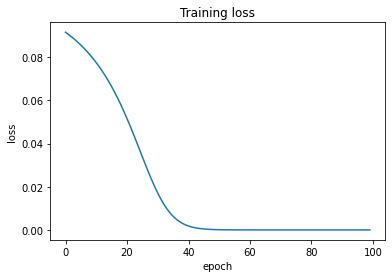

In [97]:
x = torch.tensor([2., -1., 3.], requires_grad=False)
w = torch.tensor([4., 2., -1.], requires_grad=True)
target = 0.65

print("x")
print(x)
print("x.grad")
print(x.grad)
print("w")
print(w)
print()
print()

optimizer = optim.SGD([w], lr=0.1)

losses = []
n_epochs = 100
for epoch in range(n_epochs):

    optimizer.zero_grad()
    y = torch.sigmoid(torch.sum(x * w))
    loss = torch.pow(y - target, 2)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

    if epoch < 3 or epoch > 96:
        print("w")
        print(w)
        print("w.grad")
        print(w.grad)
        print("y")
        print(y)
        print("loss")
        print(loss)
        print()
        print()
        
sns.lineplot(x=np.arange(n_epochs), y=losses).set_title('Training loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Proper PyTorch model with a fully-connected layer

A fully-connected layer is represented by torch.nn.Linear. Its parameters are:
  - in_features - the number of input neurons,
  - out_features - the number of output neurons,
  - bias - boolean if bias should be included.
  
Documentation: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [136]:
class FullyConnectedNetworkModel(nn.Module):
    def __init__(self, seed):
        super().__init__()

        self.seed = torch.manual_seed(seed)

        self.fc = nn.Linear(3, 1, bias=False)

        self.fc.weight.data = torch.tensor([4., 2., -1.], requires_grad=True)

    def forward(self, x):
        x = torch.sigmoid(self.fc(x))

        return x

w
tensor([ 3.9945,  2.0027, -1.0082])
w.grad
tensor([ 0.0547, -0.0273,  0.0820])
y
tensor(0.9526, grad_fn=<SigmoidBackward>)
loss
tensor(0.0916, grad_fn=<PowBackward0>)


w
tensor([ 3.9889,  2.0055, -1.0166])
w.grad
tensor([ 0.0563, -0.0281,  0.0844])
y
tensor(0.9508, grad_fn=<SigmoidBackward>)
loss
tensor(0.0905, grad_fn=<PowBackward0>)


w
tensor([ 3.9831,  2.0084, -1.0253])
w.grad
tensor([ 0.0579, -0.0290,  0.0869])
y
tensor(0.9489, grad_fn=<SigmoidBackward>)
loss
tensor(0.0894, grad_fn=<PowBackward0>)


w
tensor([ 3.6599,  2.1701, -1.5102])
w.grad
tensor([ 6.1291e-06, -3.0645e-06,  9.1936e-06])
y
tensor(0.6500, grad_fn=<SigmoidBackward>)
loss
tensor(4.5365e-11, grad_fn=<PowBackward0>)


w
tensor([ 3.6599,  2.1701, -1.5102])
w.grad
tensor([ 5.0985e-06, -2.5493e-06,  7.6478e-06])
y
tensor(0.6500, grad_fn=<SigmoidBackward>)
loss
tensor(3.1392e-11, grad_fn=<PowBackward0>)


w
tensor([ 3.6599,  2.1701, -1.5102])
w.grad
tensor([ 4.4477e-06, -2.2238e-06,  6.6715e-06])
y
tensor(0.6500, gra

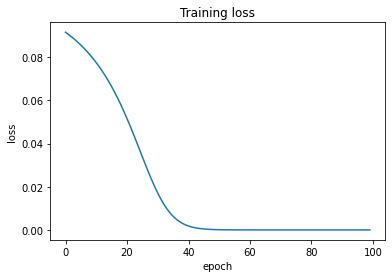

In [137]:
x = torch.tensor([2., -1., 3.])
target = 0.65

fc_neural_net = FullyConnectedNetworkModel(seed=6789)

optimizer = optim.SGD(fc_neural_net.parameters(), lr=0.1)

losses = []
n_epochs = 100
for epoch in range(n_epochs):

    optimizer.zero_grad()
    y = fc_neural_net(x)
    loss = torch.pow(y - target, 2)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    
    if epoch < 3 or epoch > 96:
        print("w")
        print(fc_neural_net.fc.weight.data)
        print("w.grad")
        print(next(fc_neural_net.parameters()).grad)
        print("y")
        print(y)
        print("loss")
        print(loss)
        print()
        print()
        
sns.lineplot(x=np.arange(n_epochs), y=losses).set_title('Training loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Embedding layer

An embedding layer is represented by torch.nn.Embedding. Its main parameters are:
  - num_embeddings - the number of ids to embed,
  - embedding_dim - the dimension of the embedding vector.
  
Documentation: https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

In the example below we will have 3 movies and 3 users. The movies have already trained representations:
  - $m0 = [2.0, 0.3, 0.5]$
  - $m1 = [-1.7, 1.2, 1.4]$
  - $m2 = [0.8, -1.5, -0.9]$
where the three dimensions represent: level of violence, positive message, language (from foul to decent).

We want to find user embeddings so that:
  - user 0 likes movie 0 and dislikes movie 1 and 2,
  - user 1 likes movie 1 and dislikes movie 0 and 2,
  - user 2 likes movie 2 and dislikes movie 0 and 1.

In [141]:
class EmbeddingNetworkModel(nn.Module):
    def __init__(self, seed):
        super().__init__()

        self.seed = torch.manual_seed(seed)

        self.embedding = nn.Embedding(3, 3)

    def forward(self, x):
        user_id = x[0]
        item_repr = x[1]
        
        y = self.embedding(user_id) * item_repr
        y = torch.sum(y)
        y = torch.sigmoid(y)

        return y

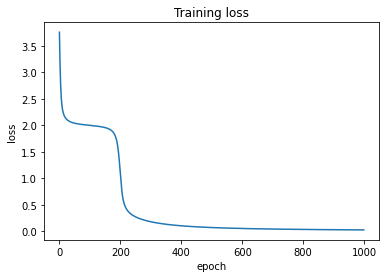

In [152]:
user_ids = [torch.tensor(0), torch.tensor(1), torch.tensor(2)]
items = [torch.tensor([2.0, 0.3, 0.5]), 
         torch.tensor([-1.7, 1.2, 1.4]), 
         torch.tensor([0.8, -1.5, -0.9])]
responses = [1, 0, 0, 0, 1, 0, 0, 0, 1]
data = [(user_ids[user_id], items[item_id]) for user_id in range(3) for item_id in range(3)]

embedding_nn = EmbeddingNetworkModel(seed=6789)

optimizer = optim.SGD(embedding_nn.parameters(), lr=0.1)

losses = []
n_epochs = 1000
for epoch in range(n_epochs):

    optimizer.zero_grad()
    
    for i in range(len(data)):
        user_id = data[i][0]
        item_repr = data[i][1]
        
        y = embedding_nn((user_id, item_repr))
        if i == 0:
            loss = torch.pow(y - responses[i], 2)
        else:
            loss += torch.pow(y - responses[i], 2)
    
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

sns.lineplot(x=np.arange(n_epochs), y=losses).set_title('Training loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [158]:
id_pairs = [(user_id, item_id) for user_id in range(3) for item_id in range(3)]

for id_pair in id_pairs:
    print("Embedding for user {}".format(id_pair[0]))
    print(embedding_nn.embedding(user_ids[id_pair[0]]))
    print("Representation for item {}".format(id_pair[1]))
    print(items[id_pair[1]])
    print("Score={}".format(round(embedding_nn((user_ids[id_pair[0]], items[id_pair[1]])).item(), 2)))
    print()

Embedding for user 0
tensor([ 3.2125,  3.5110, -0.7015], grad_fn=<EmbeddingBackward>)
Representation for item 0
tensor([2.0000, 0.3000, 0.5000])
Score=1.0

Embedding for user 0
tensor([ 3.2125,  3.5110, -0.7015], grad_fn=<EmbeddingBackward>)
Representation for item 1
tensor([-1.7000,  1.2000,  1.4000])
Score=0.1

Embedding for user 0
tensor([ 3.2125,  3.5110, -0.7015], grad_fn=<EmbeddingBackward>)
Representation for item 2
tensor([ 0.8000, -1.5000, -0.9000])
Score=0.11

Embedding for user 1
tensor([-2.1670,  0.9466,  0.5836], grad_fn=<EmbeddingBackward>)
Representation for item 0
tensor([2.0000, 0.3000, 0.5000])
Score=0.02

Embedding for user 1
tensor([-2.1670,  0.9466,  0.5836], grad_fn=<EmbeddingBackward>)
Representation for item 1
tensor([-1.7000,  1.2000,  1.4000])
Score=1.0

Embedding for user 1
tensor([-2.1670,  0.9466,  0.5836], grad_fn=<EmbeddingBackward>)
Representation for item 2
tensor([ 0.8000, -1.5000, -0.9000])
Score=0.02

Embedding for user 2
tensor([-0.8861, -1.2192, -2